In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical

In [4]:
(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
    "tf_flowers",
    split=["train[:70%]", "train[:30%]"],
    batch_size = -1,
    as_supervised = True
)

In [6]:
import tensorflow as tf
## Resizing images
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

In [7]:
vgg = VGG16(input_shape=train_ds[0].shape, weights='imagenet', include_top=False)
vgg.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

In [9]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [11]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')


model = models.Sequential([
    vgg,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [20]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

r = model.fit(train_ds, train_labels, epochs=25, validation_split=0.1, batch_size=32)

Epoch 1/25
73/73 [==============================] - 8s 90ms/step - loss: 0.0793 - accuracy: 0.9771 - val_loss: 1.7207 - val_accuracy: 0.7004
Epoch 2/25
73/73 [==============================] - 6s 77ms/step - loss: 0.1729 - accuracy: 0.9546 - val_loss: 1.6374 - val_accuracy: 0.7393
Epoch 3/25
73/73 [==============================] - 6s 79ms/step - loss: 0.1852 - accuracy: 0.9546 - val_loss: 2.1232 - val_accuracy: 0.7315
Epoch 4/25
73/73 [==============================] - 6s 79ms/step - loss: 0.1226 - accuracy: 0.9715 - val_loss: 1.8039 - val_accuracy: 0.7082
Epoch 5/25
73/73 [==============================] - 6s 77ms/step - loss: 0.0561 - accuracy: 0.9814 - val_loss: 2.0206 - val_accuracy: 0.7198
Epoch 6/25
73/73 [==============================] - 6s 78ms/step - loss: 0.0301 - accuracy: 0.9918 - val_loss: 2.1715 - val_accuracy: 0.7237
Epoch 7/25
73/73 [==============================] - 5s 75ms/step - loss: 0.0065 - accuracy: 0.9983 - val_loss: 2.0882 - val_accuracy: 0.7276
Epoch 8/25
73

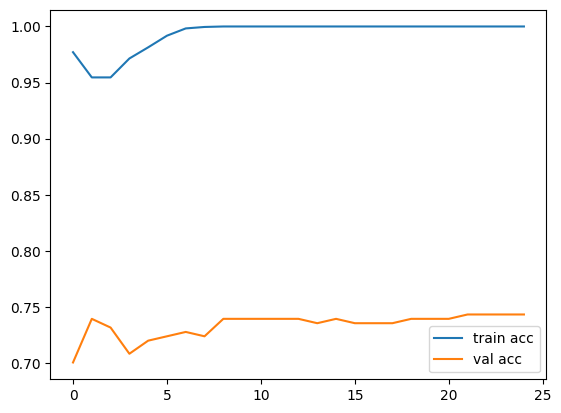

<Figure size 640x480 with 0 Axes>

In [23]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

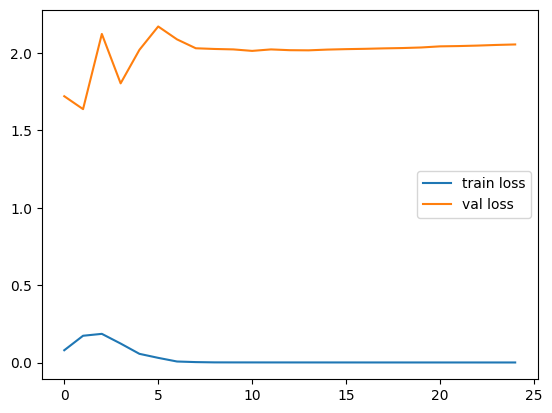

<Figure size 640x480 with 0 Axes>

In [24]:
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [27]:
model.save('flower_detection_model.h5')

___________________